In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input 
import itertools
#import datasets
test_data=pd.read_csv('test.csv')
train_data=pd.read_csv('train.csv')
#check data
print(train_data.head())
print('--------------')
print(test_data.head())
#split the data into features and label
X_train=train_data.iloc[:, 1:] # grabs all row and columns except 1st column
y_train=train_data.iloc[:, 0] # grabs only 1st column(label)

X_test=test_data.iloc[:, 1:]
y_test=test_data.iloc[:, 0]

#normalizing data from 255 to 0,1
X_train=X_train/255.0   
X_test=X_test/255.0

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

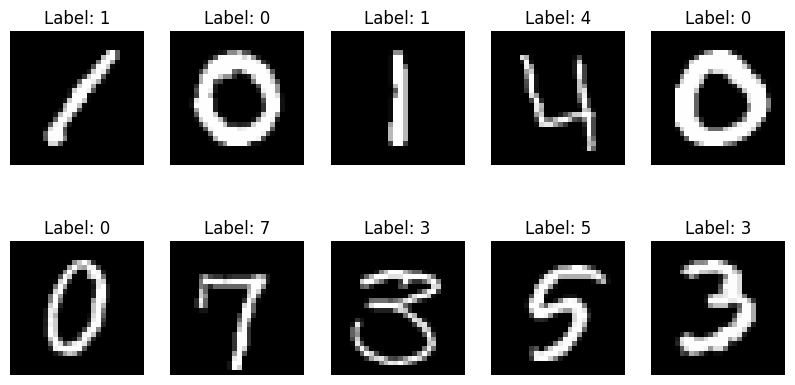

In [3]:

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')
plt.show()
#correlation to find relations in features or redundant data


In [ ]:
corr_matrix=train_data.iloc[:,1:101].corr() # data from rows and col starting from index 1 10 100 and calculates correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm')
plt.title("COrrelation")
plt.show()
#split data into train and validation (80/20)
X_train_split,X_val_split,y_train_split,y_val_split=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

#confusion matrix for error analysis
def plot_conf_mat(y_true,y_pred,model_name):
    cm=confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual data')
    plt.xlabel('Predicted data')
    plt.show()
#Decision Tree
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train_split,y_train_split)
y_pred_dt=dt_model.predict(X_val_split)
plot_conf_mat(y_val_split,y_pred_dt,'Decision Tree')

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_split, y_train_split)
y_pred_rf = rf_model.predict(X_val_split)
plot_conf_mat(y_val_split, y_pred_rf, "Random Forest")
#multilayer ann using multiple layer of nn
ann_model=Sequential()
ann_model.add(Input(shape=(X_train_split.shape[1],)))
ann_model.add(Dense(256,activation='relu'))
ann_model.add(Dense(128,activation='relu'))
ann_model.add(Dense(10,activation='softmax'))
#fitting nn model into data and spliting into test and training
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.fit(X_train_split, y_train_split, epochs=10, batch_size=64, validation_data=(X_val_split, y_val_split))
y_pred_ann=np.argmax(ann_model.predict(X_val_split),axis=-1)
plot_conf_mat(y_val_split,y_pred_ann,'Multilayer ANN')
import joblib
joblib.dump(ann_model,'handwritting.h5')